<a href="https://colab.research.google.com/github/nhut-ngnn/DPL302m_Material/blob/main/Code/EduNext_Slot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bảng thông số:

a1 a2 a3 a4

-0.1 -1.5 3 8

y=f(x)= a1x^2 + a2sin(x) + a3log10(x^2+1)  với –a4≤ x ≤a4

1) Vẽ đồ thị hàm số y.
fplot('-0.1*x^2-1.5*sin(x)+3*log10(x^2+1)',[-8 8],'r')
2) predict

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from keras.layers import Dense, Dropout, BatchNormalization

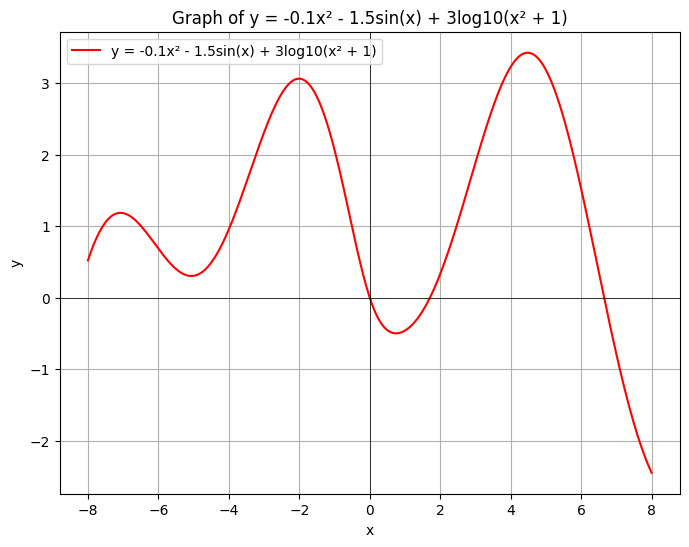

In [2]:
def f(x):
    return -0.1*x**2 - 1.5*np.sin(x) + 3*np.log10(x**2 + 1)

x = np.linspace(-8, 8, 400)

y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r', label="y = -0.1x² - 1.5sin(x) + 3log10(x² + 1)")
plt.title('Graph of y = -0.1x² - 1.5sin(x) + 3log10(x² + 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.add(Dense(256, activation='relu', input_shape=[1]))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(x_train, y_train, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.5805 - mae: 1.7228
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9838 - mae: 1.6158 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5301 - mae: 1.5350 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7197 - mae: 1.3085 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7108 - mae: 1.3355 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6106 - mae: 1.3095 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1299 - mae: 1.1737 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2812 - mae: 1.1932  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8257 - mae: 1.1139  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8484 - mae: 1.0476 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4947 - mae: 0.9517 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4666 - mae: 0.9859 
Epoch 13/100
10/10 ━━━━━

In [4]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
0.14497244276506763 0.9257128534674767
